# Assigning speeches to their proper orator


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Define custom speech class
class Speech:
    def __init__(self, text, orator):
        self.text = text
        self.orator = orator

# Importing and preparing data

In [3]:
file_name = './data/all_speeches.csv'

df = pd.read_csv(file_name)

#Set each speech entry as custom class
speeches = []
for index, row in df.iterrows():
    speech = {'text':row['text'], 'orator':row['orator']} 
    speeches.append(Speech(speech['text'], speech['orator']))

speeches[99].orator # Change orator to text to access speech text data

'clinton'

# Splitting training and testing sets

In [4]:
seed = 99
train, test = train_test_split(speeches, test_size=.25, random_state=seed)

In [5]:
train_x = [x.text for x in train]
train_y = [x.orator for x in train]

test_x = [x.text for x in test]
test_y = [x.orator for x in test]

# Vectorize with Bags of Words

In [6]:
# Define Bags of Words Count Vectorizer
vectorizer = CountVectorizer()
#vectorizer = TfidfVectorizer()

# Fit vectorizer to training data, and transformed to provide vectors
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

# Final Variables
# train_x_vectors
# train_y

# Classification

In [7]:
categories = ['bush',
              'clinton',
              'obama',
              'trump']

#### K Nearest Neighbor

In [8]:
cat_count = 0

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(train_x_vectors, train_y)

# Accuracy readouts
print(clf_knn,'ACCURACY: ', clf_knn.score(test_x_vectors, test_y))
f1scores = (f1_score(test_y, 
               clf_knn.predict(test_x_vectors),
               average=None, 
               labels=categories))
for i in f1scores:
    print(categories[cat_count]+' ACCURACY: ', i)
    cat_count += 1

KNeighborsClassifier(n_neighbors=3) ACCURACY:  0.3125
bush ACCURACY:  0.3636363636363636
clinton ACCURACY:  0.28571428571428564
obama ACCURACY:  0.35714285714285715
trump ACCURACY:  0.14285714285714285


# Saving the model

In [9]:
with open('./knn_model.pkl', 'wb') as f:
    pickle.dump(clf_knn, f)

In [10]:
# Loading model
# with open('/knn_model.pkl', 'rb') as f:
#     loaded_clf_knn = pickle.load(f)

# Evaluating different n_neighbor values


In [11]:
k_range = range(1,50)
accuracy_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x_vectors, train_y)
    accuracy_score = knn.score(test_x_vectors, test_y)
    accuracy_scores.append(accuracy_score)
    
high_acc = (max(accuracy_scores))
high_acc_id = accuracy_scores.index(high_acc)
print('Highest accuracy: ',high_acc)
print('K value :', high_acc_id+1)

Highest accuracy:  0.3125
K value : 3


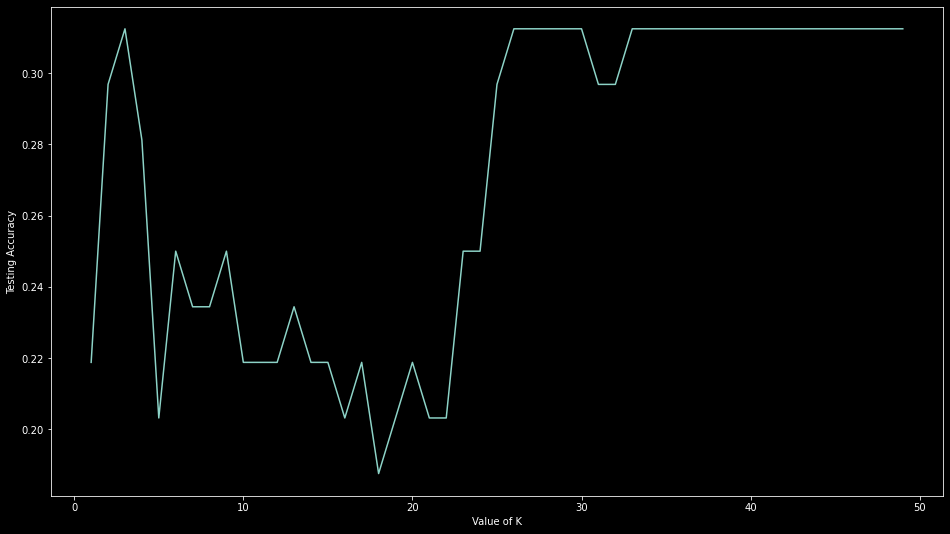

In [13]:
plt.figure(figsize=(16,9))
plt.style.use('dark_background')
plt.plot([i for i in k_range], accuracy_scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')
plt.savefig('figs/k_val_plot.png')

# Part 1 Summary
Overall we see that, at best, our model is assigning orators with an accuracy of %31.25, even when finding the best value for k. Ultimately, the innacuracy of our model is likely due to our input data, how we have vectorized it, and the chunks size in which we put data in! Lets now play around with altering the size of our input text cunks, both in terms of training and test data! See the 'part2' notebooks for these investigations.